**Name:** Farhan Rahman

**NetID:** fr2119



First Task is to import neseccary libraries.

In [ ]:
from sklearn import datasets
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

# for 3d interactive plots
from ipywidgets import interact, fixed
from mpl_toolkits import mplot3d


%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

For reading the data set "Advertising.csv", I used the link adress from the author's website as follows.

In [ ]:
url = 'http://faculty.marshall.usc.edu/gareth-james/ISL/Advertising.csv'
ds = pd.read_csv(url,index_col=0)


To get a brief overview of the type of data we are dealing with I used the following.The head() method display the first few data values.

In [ ]:
ds.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Now to visualise the relation between the different features of our dataset we can use pairplot() which gives us the scater plot between two features and the histogram.   

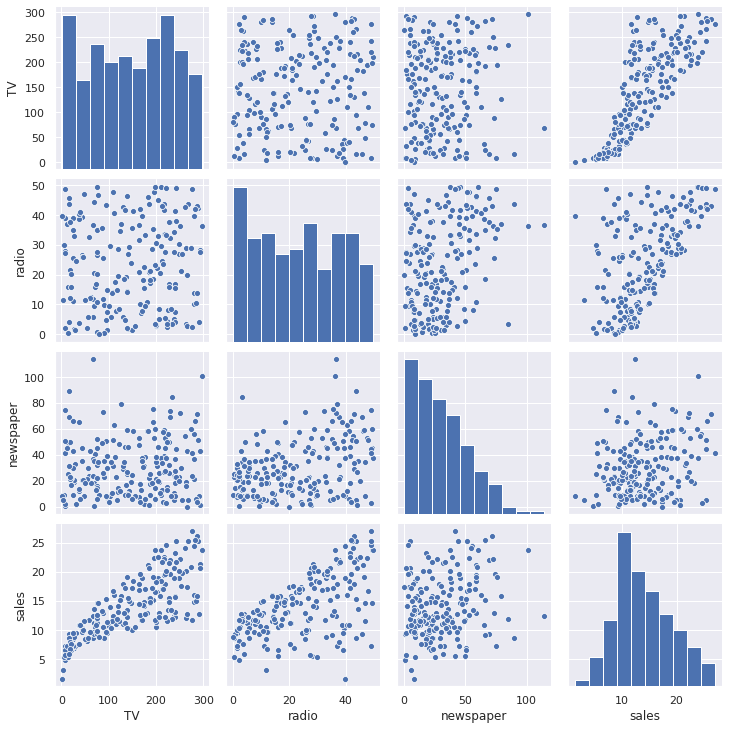

In [ ]:
sns.pairplot(ds);

To see how a linear regression line fits all the relation (plots) we can use kind ="reg" using the seaborn library.

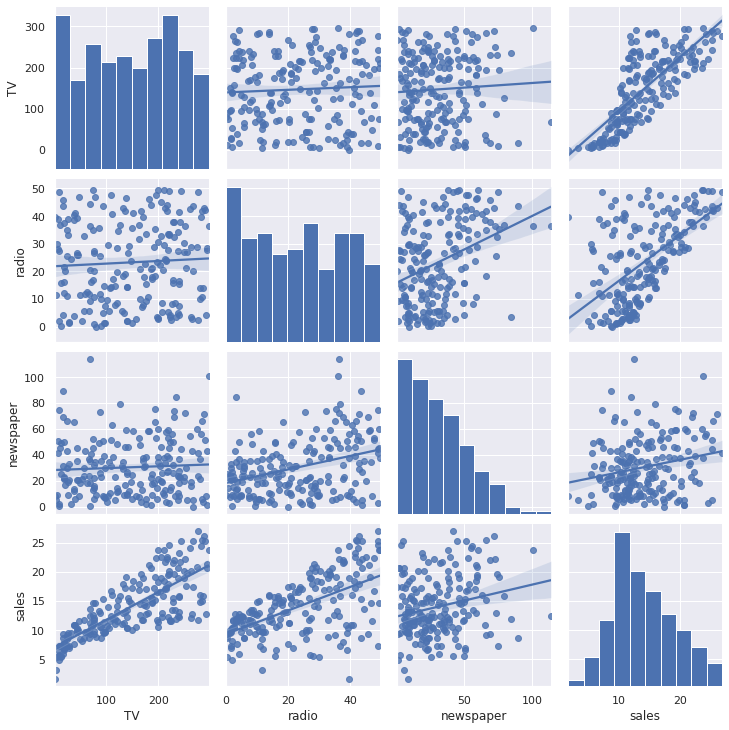

In [ ]:
g = sns.pairplot(ds, kind="reg")

As it is evident that there many features that are correlated to each other we can use our common sense or analytical skills or ponder upon the .corr() function to that for us.

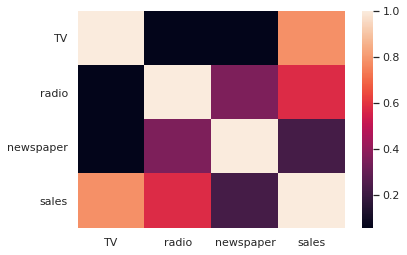

In [ ]:
corr = ds.corr()
sns.heatmap(corr)

The heatmap gives us the extent to which these features are correlated with each other and espically focusing on the last row which is the relation between the sales and the advertising budget.It is quite clear that the sales of TV is positively correlated to the budget of advertising while the correlation between radio and sales is decreasing and it decreases even further for the the sales of newspaper and the budget of advertising.

Now to get into the ML part we have to fit regression models.We have to split the model into 70:30 

In [ ]:
train, test = train_test_split(ds, test_size=0.3)

In [ ]:
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 150 to 56
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         140 non-null    float64
 1   radio      140 non-null    float64
 2   newspaper  140 non-null    float64
 3   sales      140 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 170 to 93
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         60 non-null     float64
 1   radio      60 non-null     float64
 2   newspaper  60 non-null     float64
 3   sales      60 non-null     float64
dtypes: float64(4)
memory usage: 2.3 KB


After splitting the data into required spilt we can proceed to train the model, althought the linear univarate model is not the best fit for all the features we can use it to see how it works with different features. For fitting the training data we can use the .fit function.

In [ ]:
reg_tv = LinearRegression().fit(train[['TV']], train['sales'])
reg_radio = LinearRegression().fit(train[['radio']], train['sales'])
reg_news = LinearRegression().fit(train[['newspaper']], train['sales'])

For the intercept and coefficient values we can use the .intercept_ and .coef_

In [ ]:
print("TV: ", reg_tv.coef_[0], reg_tv.intercept_)
print("Radio: ", reg_radio.coef_[0], reg_radio.intercept_)
print("Newspaper: ", reg_news.coef_[0], reg_news.intercept_)

TV:  0.04538800976455547 7.419155839124203
Radio:  0.20852085254440827 9.22127040209196
Newspaper:  0.04736353326313257 12.532951188982924


fitting the model for the test set.

In [ ]:
y_pred_tv = reg_tv.predict(test[['TV']])
y_pred_radio = reg_radio.predict(test[['radio']])
y_pred_news = reg_news.predict(test[['newspaper']])

We can observe how the linear regressiong model fits our traning and test set using the following plots. The red blue points are the scatter plot for the training set while the green colored points are for the test data set . 

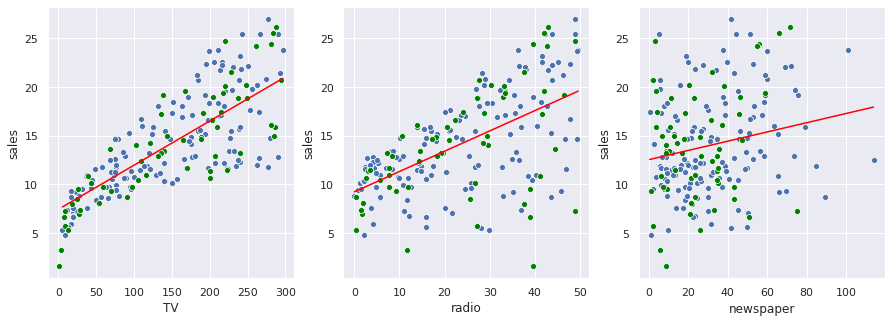

In [ ]:
fig = plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.scatterplot(data=train, x="TV", y="sales");
sns.scatterplot(data=test,x="TV", y="sales",color='green');
sns.lineplot(data=train, x="TV", y=reg_tv.predict(train[['TV']]), color='red');

plt.subplot(1,3,2)
sns.scatterplot(data=train, x="radio", y="sales");
sns.scatterplot(data=test,x="radio", y="sales",color='green');
sns.lineplot(data=train, x="radio", y=reg_radio.predict(train[['radio']]), color='red');

plt.subplot(1,3,3)
sns.scatterplot(data=train,x="newspaper", y="sales");
sns.scatterplot(data=test,x="newspaper", y="sales",color='green');
sns.lineplot(data=train, x="newspaper", y=reg_news.predict(train[['newspaper']]), color='red');


Using the mathematical method to calculate the R2 score is as follows.

In [ ]:
r2_tv = 1-np.mean( (y_pred_tv - test['sales'])**2 / np.std(test['sales'])**2 )
r2_radio = 1-np.mean( (y_pred_radio - test['sales'])**2 / np.std(test['sales'])**2 )
r2_news = 1-np.mean( (y_pred_news - test['sales'])**2 / np.std(test['sales'])**2 )
print("TV: ", r2_tv)
print("Radio: ", r2_radio)
print("Newspaper: ", r2_news)

TV:  0.6898701888494395
Radio:  0.23131405832703855
Newspaper:  0.060792498280083374


Although the same can be achived by the inbult metrics parameter using metrics.mean_suarred_error and metrics.r2_score.

In [ ]:
print('Mean Squared Error for TV:', metrics.mean_squared_error(test['sales'], y_pred_tv))  
print('R2 score for TV:',(metrics.r2_score(test['sales'], y_pred_tv)))
print('Mean Squared Error for Radio:', metrics.mean_squared_error(test['sales'], y_pred_radio))  
print('R2 score for Radio:',(metrics.r2_score(test['sales'], y_pred_radio)))
print('Mean Squared Error for Newspaper:', metrics.mean_squared_error(test['sales'], y_pred_news))  
print('R2 score for Newspaper:',(metrics.r2_score(test['sales'], y_pred_news)))

Mean Squared Error for TV: 9.837820709167202
R2 score for TV: 0.6898701888494394
Mean Squared Error for Radio: 24.383965049282832
R2 score for Radio: 0.23131405832703844
Mean Squared Error for Newspaper: 29.793185557836335
R2 score for Newspaper: 0.06079249828008293


Apparently the best fit of a model is not classified depending on the R2 score or the mean squared error, but still it helps us to get a gist of what is going on with the model. As discussed in the classes that the the lesser the MSE the model fits the linear regression line better and the closest our R2  value to 1 , the better is our model. So keeping all this in mind we can say that the model for TV serves the best fit for the linear regression model, although just the R2 score and the MSE values are in no way adequate to say which models is the best.Now to understand this better we can use various plots to understand the exact relationship between the different features.

**Various other plots:** the plots below shows us the relation between the actual sales and the predicted sales. For the model that fits the best as a linear regression type we can expect that the relation between sales and ypredicted should be linear and highly correlated which is observed for the sales of TV while decreased correlation is observed between the other two which is radio and rewspaper.

(0.0, 30.0)

(0.0, 30.0)

(0.0, 30.0)

(0.0, 30.0)

(0.0, 30.0)

(0.0, 30.0)

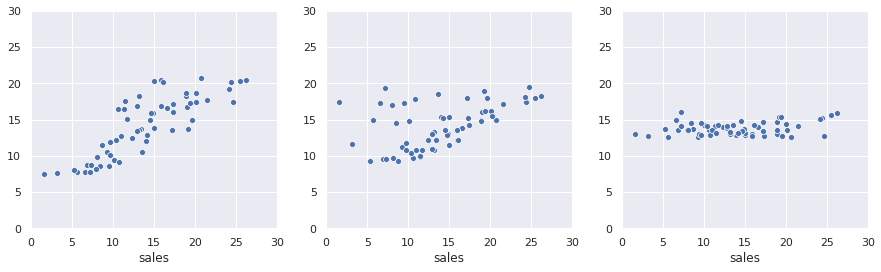

In [ ]:
fig = plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.scatterplot(data=test, x="sales", y= y_pred_tv);
plt.xlim(0,30)
plt.ylim(0,30)

plt.subplot(1,3,2)
sns.scatterplot(data=test, x="sales", y= y_pred_radio);
plt.xlim(0,30)
plt.ylim(0,30)

plt.subplot(1,3,3)
sns.scatterplot(data=test, x="sales", y= y_pred_news);
plt.xlim(0,30)
plt.ylim(0,30)


In [ ]:
yres_tv = test['sales']- y_pred_tv
yres_radio = test['sales']- y_pred_radio
yres_news = test['sales']- y_pred_news


print(np.mean(test['sales']- y_pred_tv))
print(np.mean(test['sales']- y_pred_radio))
print(np.mean(test['sales']- y_pred_news))
#print(y_pred_radio - test['sales'])
#print(y_pred_news - test['sales'])


-0.2354075497628375
-0.16599838561691177
0.14134471898441184


Residual value can be seen as a parameter of best fit of a model,it can be seen as a measure of correlation between the functions.As we know that the best model will have the mean residual close to zero.Here we observe that the model for TV might have some overfiting issues while the model used to fit the newspaper is defnitely underfiting the data.

Text(0.5, 0, 'TV residual')

(3.0, 30.0)

(-15.0, 15.0)

Text(0.5, 0, 'Radio residual')

(3.0, 30.0)

(-15.0, 15.0)

Text(0.5, 0, 'News residual')

(3.0, 30.0)

(-15.0, 15.0)

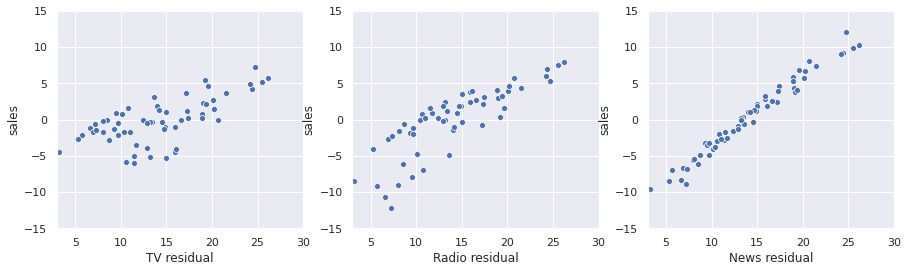

In [ ]:
fig = plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
ax= sns.scatterplot(data=test, x="sales", y= yres_tv);
ax.set_xlabel('TV residual')
plt.xlim(3,30)
plt.ylim(-15,15)


plt.subplot(1,3,2)
ax=sns.scatterplot(data=test, x="sales", y= yres_radio);
ax.set_xlabel('Radio residual')
plt.xlim(3,30)
plt.ylim(-15,15)


plt.subplot(1,3,3)
ax=sns.scatterplot(data=test, x="sales", y= yres_news);
ax.set_xlabel('News residual')
plt.xlim(3,30)
plt.ylim(-15,15)

As we noticed earlier that the linear model is not the best fit for this data set so we try to various plots to get conclude that a relationship exitst between combination of various parameters. This can be achieved by plotting a scatterplot against the the features like the radio,tv and newspaper ad budget and the residual of each of the predicted models. We can observe that there exists a stong correlaton between the combination of radio and tv ad budgets and even maybe between the combination of newspaper and radio ad budgets.

Text(0.5, 0, 'TV residual')

Text(0, 0.5, 'TV budget')

Text(0.5, 1.0, 'linear regression of tv_reg')

Text(0.5, 0, 'TV residual')

Text(0, 0.5, 'radio budget')

Text(0.5, 1.0, 'linear regression of tv_reg')

Text(0.5, 0, 'TV residual')

Text(0, 0.5, 'newspaper budget')

Text(0.5, 1.0, 'linear regression of tv_reg')

Text(0.5, 0, 'Radio residual')

Text(0, 0.5, 'TV budget')

Text(0.5, 1.0, 'linear regression of radio_reg')

Text(0.5, 0, 'Radio residual')

Text(0, 0.5, 'radio budget')

Text(0.5, 1.0, 'linear regression of radio_reg')

Text(0.5, 0, 'Radio residual')

Text(0, 0.5, 'newspaper budget')

Text(0.5, 1.0, 'linear regression of radio_reg')

Text(0.5, 0, 'newspaper residual')

Text(0, 0.5, 'TV budget')

Text(0.5, 1.0, 'linear regression of newspaper_reg')

Text(0.5, 0, 'newspaper residual')

Text(0, 0.5, 'radio budget')

Text(0.5, 1.0, 'linear regression of newspaper_reg')

Text(0.5, 0, 'newspaper residual')

Text(0, 0.5, 'newspaper budget')

Text(0.5, 1.0, 'linear regression of newspaper_reg')

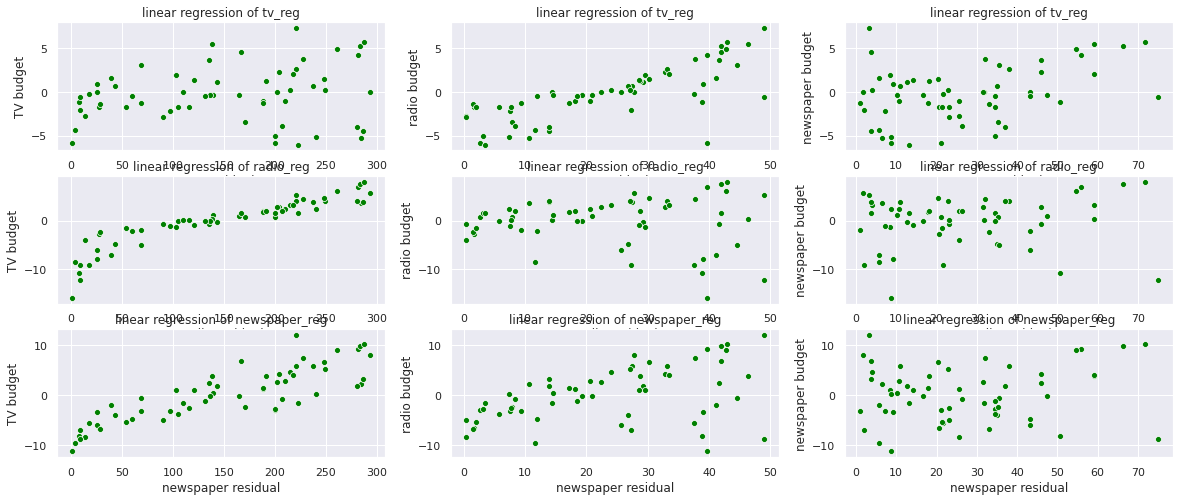

In [ ]:
fig = plt.figure(figsize=(20,8))
plt.subplot(3,3,1)
ax= sns.scatterplot(data=test, x="TV", y= yres_tv,color='green');
ax.set_xlabel('TV residual')
ax.set_ylabel('TV budget')
ax.set_title('linear regression of tv_reg')



plt.subplot(3,3,2)
ax=sns.scatterplot(data=test, x="radio", y= yres_tv,color='green');
ax.set_xlabel('TV residual')
ax.set_ylabel('radio budget')
ax.set_title('linear regression of tv_reg')





plt.subplot(3,3,3)

ax=sns.scatterplot(data=test, x="newspaper", y= yres_tv,color='green');
ax.set_xlabel('TV residual')
ax.set_ylabel('newspaper budget')
ax.set_title('linear regression of tv_reg')



plt.subplot(3,3,4)

ax=sns.scatterplot(data=test, x="TV", y= yres_radio,color='green');
ax.set_xlabel('Radio residual')
ax.set_ylabel('TV budget')
ax.set_title('linear regression of radio_reg')



plt.subplot(3,3,5)

ax=sns.scatterplot(data=test, x="radio", y= yres_radio,color='green');
ax.set_xlabel('Radio residual')
ax.set_ylabel('radio budget')
ax.set_title('linear regression of radio_reg')



plt.subplot(3,3,6)

ax=sns.scatterplot(data=test, x="newspaper", y= yres_radio,color='green');
ax.set_xlabel('Radio residual')
ax.set_ylabel('newspaper budget')
ax.set_title('linear regression of radio_reg')




plt.subplot(3,3,7)

ax=sns.scatterplot(data=test, x="TV", y= yres_news,color='green');
ax.set_xlabel('newspaper residual')
ax.set_ylabel('TV budget')
ax.set_title('linear regression of newspaper_reg')



plt.subplot(3,3,8)

ax=sns.scatterplot(data=test, x="radio", y= yres_news,color='green');
ax.set_xlabel('newspaper residual')
ax.set_ylabel('radio budget')
ax.set_title('linear regression of newspaper_reg')

plt.subplot(3,3,9)

ax=sns.scatterplot(data=test, x="newspaper", y= yres_news,color='green');
ax.set_xlabel('newspaper residual')
ax.set_ylabel('newspaper budget')
ax.set_title('linear regression of newspaper_reg')



Now because of the shortcomings of the linear regression model to justify every feature we can use the mutiple regression model which analyses a combination of parameters like tv,radio and newspaper

In [ ]:
reg_multi_ad = LinearRegression().fit(train[['TV', 'radio', 'newspaper']], train['sales'])
y_train_multi_ad = reg_multi_ad.predict(train[['TV', 'radio', 'newspaper']])
r2_train_multi_ad = 1-np.mean( (y_train_multi_ad - train['sales'])**2 / np.std(train['sales'])**2 )
print("Coefficients (TV, radio, newspaper):", reg_multi_ad.coef_)
print("Intercept: ", reg_multi_ad.intercept_)
print("Multiple regression: ", r2_train_multi_ad)
print("Mse for training set: ", metrics.mean_squared_error(train['sales'], y_train_multi_ad))

Coefficients (TV, radio, newspaper): [ 0.0439533   0.20371999 -0.01021803]
Intercept:  3.2285807385476364
Multiple regression:  0.9165077745316245
Mse for training set:  2.095096781885887


In [ ]:
y_pred_multi_ad = reg_multi_ad.predict(test[['TV', 'radio', 'newspaper']])
r2_multi_ad = 1-np.mean( (y_pred_multi_ad - test['sales'])**2 / np.std(test['sales'])**2 )
print("Multiple regression: ", r2_multi_ad)
print("Mse for test set: ", metrics.mean_squared_error(test['sales'], y_pred_multi_ad))

Multiple regression:  0.851923450168499
Mse for test set:  4.69722837372494


In [ ]:
yres_multi_test = test['sales']- y_pred_multi_ad
yres_multi_train= train['sales']-y_train_multi_ad


print(np.mean(yres_multi_test))
print(np.mean(yres_multi_train))
#print(np.mean(test['sales']- y_pred_news))
#print(y_pred_radio - test['sales'])
#print(y_pred_news - test['sales'])


-0.32074614314709377
7.549516567451064e-16


Text(0, 0.5, 'residual')

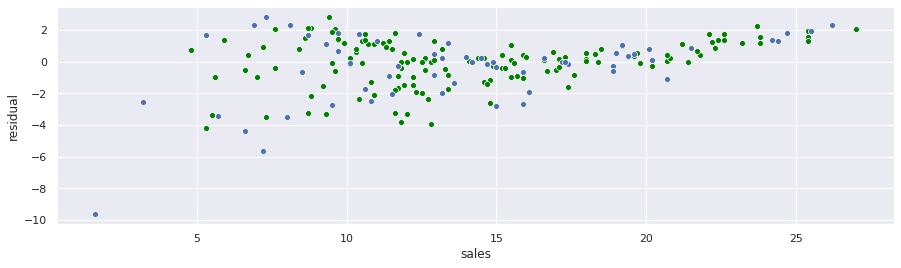

In [ ]:
fig = plt.figure(figsize=(15,4))
ax=sns.scatterplot(data=train, x="sales", y= yres_multi_train,color='green');
ax= sns.scatterplot(data=test, x="sales", y= yres_multi_test);
plt.ylabel('residual')

Text(0.5, 0, 'Mutliple regression residual')

Text(0, 0.5, 'TV budget')

Text(0.5, 1.0, 'multiple regression model')

Text(0.5, 0, 'Mutliple regression residual')

Text(0, 0.5, 'radio budget')

Text(0.5, 1.0, 'multiple regression model')

Text(0.5, 0, 'Mutliple regression residual')

Text(0, 0.5, 'newspaper budget')

Text(0.5, 1.0, 'multiple regression model')

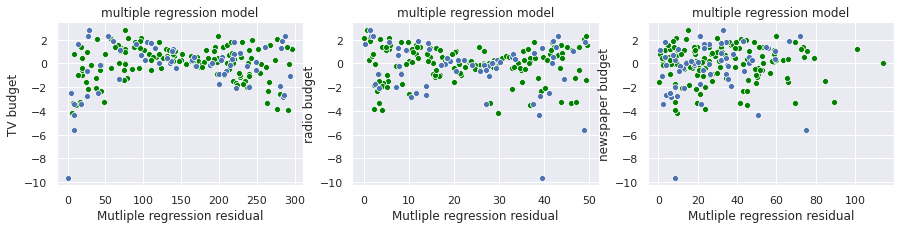

In [ ]:
fig = plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
ax=sns.scatterplot(data=train, x="TV", y= yres_multi_train,color='green');
ax= sns.scatterplot(data=test, x="TV", y= yres_multi_test);
ax.set_xlabel('Mutliple regression residual')
ax.set_ylabel('TV budget')
ax.set_title('multiple regression model')



plt.subplot(1,3,2)
ax=sns.scatterplot(data=train, x="radio", y= yres_multi_train,color='green');
ax= sns.scatterplot(data=test, x="radio", y= yres_multi_test);
ax.set_xlabel('Mutliple regression residual')
ax.set_ylabel('radio budget')
ax.set_title('multiple regression model')


plt.subplot(1,3,3)
ax=sns.scatterplot(data=train, x="newspaper", y= yres_multi_train,color='green');
ax= sns.scatterplot(data=test, x="newspaper", y= yres_multi_test);
ax.set_xlabel('Mutliple regression residual')
ax.set_ylabel('newspaper budget')
ax.set_title('multiple regression model')



In [ ]:
ds['news_radio'] = ds['newspaper']*ds['radio']
ds['tv_radio'] = ds['TV']*ds['radio']
ds['news_tv'] = ds['newspaper']*ds['TV']
ds['news_radio_tv'] = ds['newspaper']*ds['radio']*ds['TV']
ds

,TV,radio,newspaper,sales,news_radio,tv_radio,news_tv,news_radio_tv
1,230.1,37.8,69.2,22.1,2615.76,8697.78,15922.92,601886.376
2,44.5,39.3,45.1,10.4,1772.43,1748.85,2006.95,78873.135
3,17.2,45.9,69.3,9.3,3180.87,789.48,1191.96,54710.964
4,151.5,41.3,58.5,18.5,2416.05,6256.95,8862.75,366031.575
5,180.8,10.8,58.4,12.9,630.72,1952.64,10558.72,114034.176
...,...,...,...,...,...,...,...,...
196,38.2,3.7,13.8,7.6,51.06,141.34,527.16,1950.492
197,94.2,4.9,8.1,9.7,39.69,461.58,763.02,3738.798
198,177.0,9.3,6.4,12.8,59.52,1646.10,1132.80,10535.040
199,283.6,42.0,66.2,25.5,2780.40,11911.20,18774.32,788521.440


In [ ]:
train, test = train_test_split(ds, test_size=0.3)

In [ ]:
reg_tv = LinearRegression().fit(train[['TV']], train['sales'])
reg_radio = LinearRegression().fit(train[['radio']], train['sales'])
reg_news = LinearRegression().fit(train[['newspaper']], train['sales'])
reg_news_radio = LinearRegression().fit(train[['news_radio']], train['sales'])
reg_tv_radio = LinearRegression().fit(train[['tv_radio']], train['sales'])
reg_news_tv = LinearRegression().fit(train[['news_tv']], train['sales'])
reg_news_radio_tv = LinearRegression().fit(train[['news_radio_tv']], train['sales'])

In [ ]:
y_pred_tv = reg_tv.predict(test[['TV']])
y_pred_radio = reg_radio.predict(test[['radio']])
y_pred_news = reg_news.predict(test[['newspaper']])
y_pred_news_radio = reg_news_radio.predict(test[['news_radio']])
y_pred_tv_radio = reg_tv_radio.predict(test[['tv_radio']])
y_pred_news_tv = reg_news_tv.predict(test[['news_tv']])
y_pred_news_radio_tv = reg_news_radio_tv.predict(test[['news_radio_tv']])


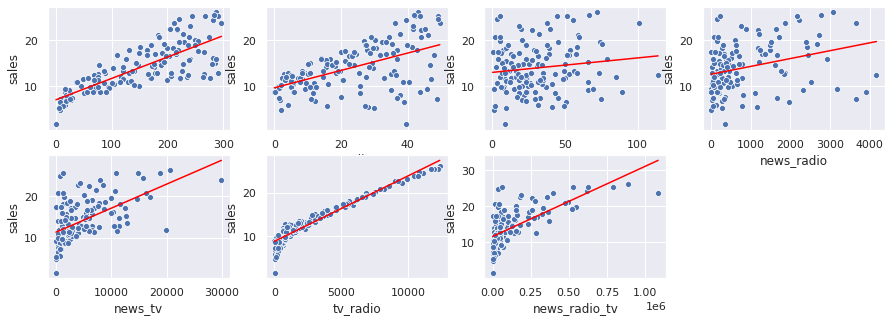

In [ ]:
fig = plt.figure(figsize=(15,5))

plt.subplot(2,4,1)
sns.scatterplot(data=train, x="TV", y="sales");
sns.lineplot(data=train, x="TV", y=reg_tv.predict(train[['TV']]), color='red');

plt.subplot(2,4,2)
sns.scatterplot(data=train, x="radio", y="sales");
sns.lineplot(data=train, x="radio", y=reg_radio.predict(train[['radio']]), color='red');

plt.subplot(2,4,3)
sns.scatterplot(data=train,x="newspaper", y="sales");
sns.lineplot(data=train, x="newspaper", y=reg_news.predict(train[['newspaper']]), color='red');

plt.subplot(2,4,4)
sns.scatterplot(data=train,x="news_radio", y="sales");
sns.lineplot(data=train, x="news_radio", y=reg_news_radio.predict(train[['news_radio']]), color='red');


plt.subplot(2,4,5)
sns.scatterplot(data=train,x="news_tv", y="sales");
sns.lineplot(data=train, x="news_tv", y=reg_news_tv.predict(train[['news_tv']]), color='red');

plt.subplot(2,4,6)
sns.scatterplot(data=train,x="tv_radio", y="sales");
sns.lineplot(data=train, x="tv_radio", y=reg_tv_radio.predict(train[['tv_radio']]), color='red');


plt.subplot(2,4,7)
sns.scatterplot(data=train,x="news_radio_tv", y="sales");
sns.lineplot(data=train, x="news_radio_tv", y=reg_news_radio_tv.predict(train[['news_radio_tv']]), color='red');



After trying out various combination of features we see a strong correlaton sales and the TV*radio pair and even the news_radio_tv which shows that there is rise in sales for the overall set if we increase the budget of advertising of all the features which is a very important relation established by these graphs as we can increase the overall sales and if we want to focus on the best way to increase sales we can say that if we spend more on advertising for TV and radio we are bound to achieve maximum sales.

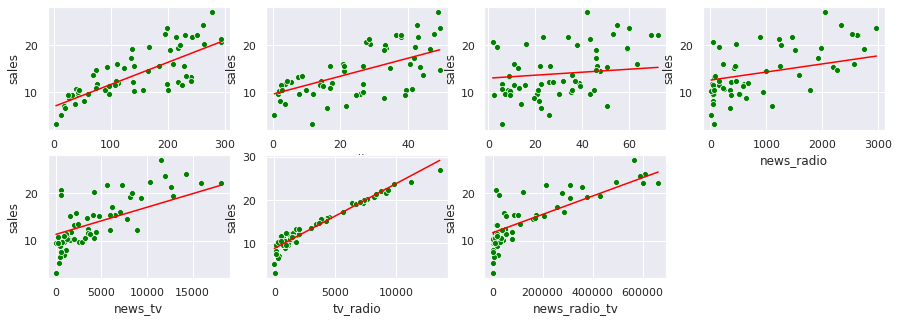

In [ ]:
fig = plt.figure(figsize=(15,5))


plt.subplot(2,4,1)
sns.scatterplot(data=test, x="TV", y="sales",color='green');
sns.lineplot(data=test, x="TV", y=reg_tv.predict(test[['TV']]), color='red');

plt.subplot(2,4,2)
sns.scatterplot(data=test, x="radio", y="sales",color='green');
sns.lineplot(data=test, x="radio", y=reg_radio.predict(test[['radio']]), color='red');

plt.subplot(2,4,3)
sns.scatterplot(data=test,x="newspaper", y="sales",color='green');
sns.lineplot(data=test, x="newspaper", y=reg_news.predict(test[['newspaper']]), color='red');

plt.subplot(2,4,4)
sns.scatterplot(data=test,x="news_radio", y="sales",color='green');
sns.lineplot(data=test, x="news_radio", y=reg_news_radio.predict(test[['news_radio']]), color='red');


plt.subplot(2,4,5)
sns.scatterplot(data=test,x="news_tv", y="sales",color='green');
sns.lineplot(data=test, x="news_tv", y=reg_news_tv.predict(test[['news_tv']]), color='red');

plt.subplot(2,4,6)
sns.scatterplot(data=test,x="tv_radio", y="sales",color='green');
sns.lineplot(data=test, x="tv_radio", y=reg_tv_radio.predict(test[['tv_radio']]), color='red');


plt.subplot(2,4,7)
sns.scatterplot(data=test,x="news_radio_tv", y="sales",color='green');
sns.lineplot(data=test, x="news_radio_tv", y=reg_news_radio_tv.predict(test[['news_radio_tv']]), color='red');

As discussed earlier the closer the mean residual value to zero, the better is the model. This point is clarified below as we notice that the linear model proves to be quite efficient to describe the sales of combination of TV and radio(TV*Radio).

In [ ]:
yres_tv = test['sales']- y_pred_tv
yres_radio = test['sales']- y_pred_radio
yres_news = test['sales']- y_pred_news
yres_news_radio = test['sales']- y_pred_news_radio
yres_news_tv= test['sales']- y_pred_news_tv
yres_tv_radio = test['sales']- y_pred_tv_radio
yres_news_radio_tv = test['sales']- y_pred_news_radio_tv
print(np.mean(yres_tv))
print(np.mean(yres_radio))
print(np.mean(yres_news))
print(np.mean(yres_news_radio))
print(np.mean(yres_news_tv))
print(np.mean(yres_tv_radio))
print(np.mean(yres_news_radio_tv))


0.4994855309210653
-0.09728225329292188
0.17751457429743606
0.051031355268480814
0.21214840234654073
-0.05657004822411074
-0.2371146202107957


Text(0.5, 0, 'TV residual')

Text(0.5, 0, 'Radio residual')

Text(0.5, 0, 'News residual')

Text(0.5, 0, 'news_radio residual')

Text(0.5, 0, 'news TV residual')

Text(0.5, 0, 'TV radio residual')

Text(0.5, 0, 'news radio tv residual')

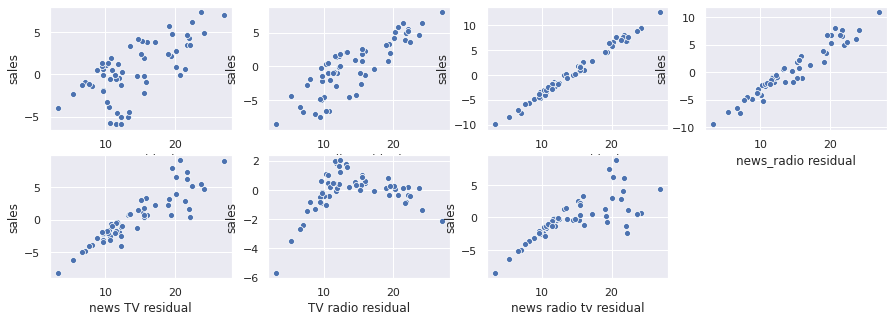

In [ ]:
fig = plt.figure(figsize=(15,5))
plt.subplot(2,4,1)
ax= sns.scatterplot(data=test, x="sales", y= yres_tv);
ax.set_xlabel('TV residual')


plt.subplot(2,4,2)
ax=sns.scatterplot(data=test, x="sales", y= yres_radio);
ax.set_xlabel('Radio residual')


plt.subplot(2,4,3)
ax=sns.scatterplot(data=test, x="sales", y= yres_news);
ax.set_xlabel('News residual')


plt.subplot(2,4,4)
ax= sns.scatterplot(data=test, x="sales", y= yres_news_radio);
ax.set_xlabel('news_radio residual')


plt.subplot(2,4,5)
ax=sns.scatterplot(data=test, x="sales", y= yres_news_tv);
ax.set_xlabel('news TV residual')


plt.subplot(2,4,6)
ax=sns.scatterplot(data=test, x="sales", y=yres_tv_radio);
ax.set_xlabel('TV radio residual')

plt.subplot(2,4,7)
ax=sns.scatterplot(data=test, x="sales", y=yres_news_radio_tv);
ax.set_xlabel('news radio tv residual')

This is just a quick way to analyse what we did till now using statsmodels library,which gives us all the important relation parameters and gives us the R2 score the accuracy and the interdependece of the different features.
The Condition Number here tells us that there is a very high correlation between the different features selected by us, in our case it can be the feature of radio*TV.

In [ ]:
import statsmodels.formula.api as sm
model1 = sm.ols(formula="sales~radio*newspaper", data=ds).fit()
print(model1.summary())
model2 = sm.ols(formula="sales~TV*newspaper", data=ds).fit()
print(model2.summary())
model3 = sm.ols(formula="sales~radio*TV", data=ds).fit()
print(model3.summary())
model4 = sm.ols(formula="sales~radio*newspaper*TV", data=ds).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     32.70
Date:                Fri, 26 Jun 2020   Prob (F-statistic):           3.51e-17
Time:                        06:42:21   Log-Likelihood:                -573.11
No. Observations:                 200   AIC:                             1154.
Df Residuals:                     196   BIC:                             1167.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           8.7905      1.022     